# Brief Description

The purpose of this project was to conduct binary classification using logistic regression on census data to classify if an individual earns an income of less than or equal to US50,000 or greater than US50,000 based on certain variables. The explanatory variables in the dataset were age, work class, education, education num, marital status, relationship, race, gender, capital gain, capital loss, hours per week, and native country. I sourced the data from the UCI machine learning repository, and it is based on 1994 census data from the US Census Bureau.

In [1]:
#importing all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings
from PIL import Image
warnings.filterwarnings("ignore")
%matplotlib
sns.set()
sns.set_style('white')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

Using matplotlib backend: Qt5Agg


# Importing and exploring the distributions of the variables of the dataset

In [2]:
df_census = pd.read_csv('census income.csv')
df_census.head()

,age,work class,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#Plotting gender distribution
ax = sns.histplot(data = df_census, 
                  x = 'sex',
                  hue = 'sex')

plt.title('Distribution of gender', 
          fontsize = 14, 
          fontweight = 'bold')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

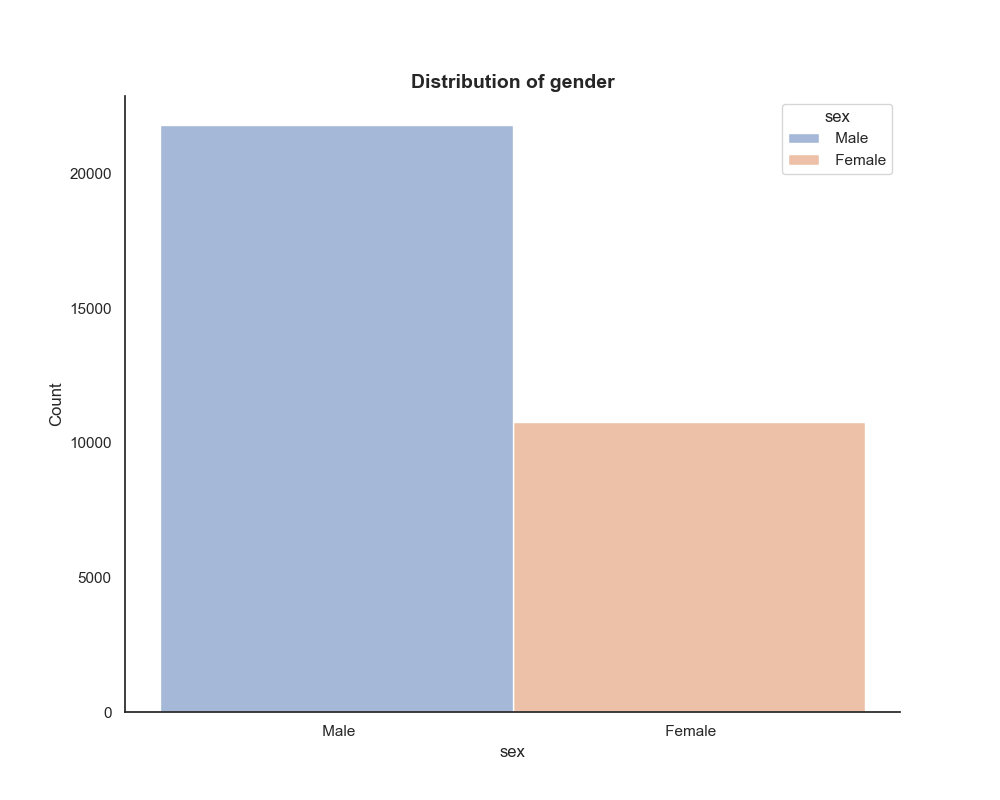

In [4]:
Image.open('Distribution of gender.png')

**COMMENTS ON THE DISTRIBUTION** 

In the population data, there are about double more men than there are women.

In [5]:
#Ploting age and  income distribution
ax = sns.histplot(data = df_census, 
                  x = 'age',
                  hue = 'income')

plt.title('Distribution of age and income', 
          fontsize = 14, 
          fontweight = 'bold')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

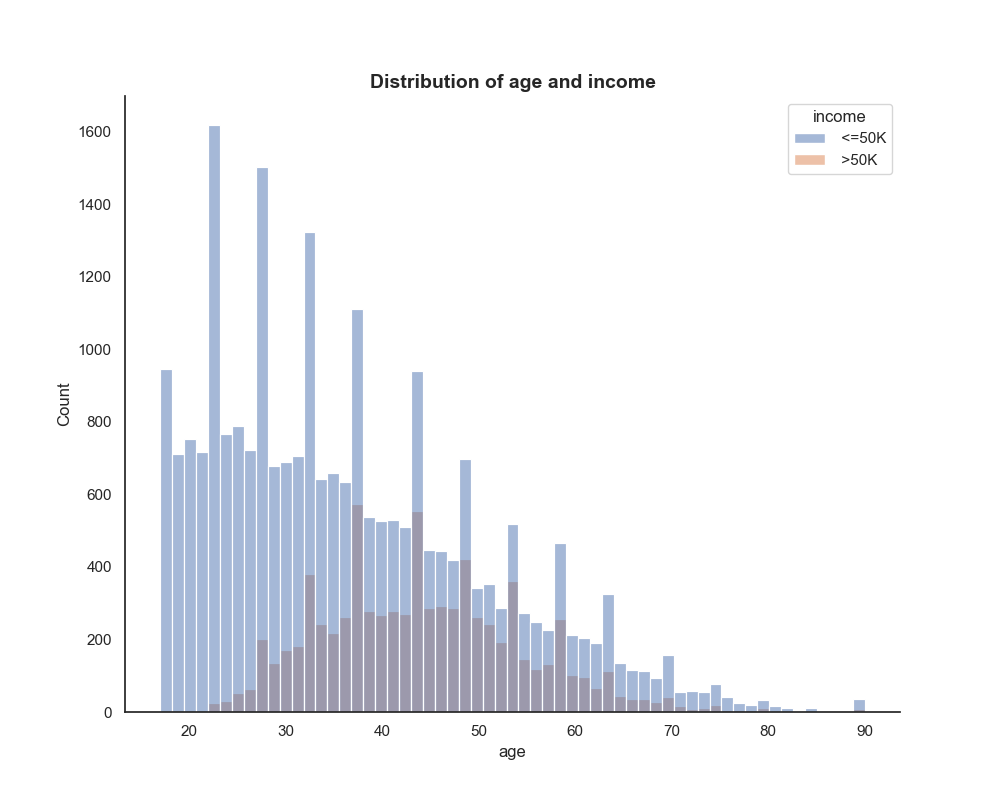

In [6]:
Image.open('Distribution of age and income.png')

**COMMENTS ON THE DISTRIBUTION** 

From the histogram above, more people in different age groups earn 50,000 or less compared to those earning above that. From the distribution, the data is heavily clustered between the ages of 20 and 50 for those earning 50,000 or less. For those earning more than 50,000 the ages are clustered between the late 30s to early 50s.

In [7]:
#plotting education and gender distribution
ax = sns.histplot(data = df_census, 
                  x = 'education',
                  hue = 'sex')

plt.title('Distribution of gender and education levels', 
          fontsize = 14, 
          fontweight = 'bold')

plt.xticks(rotation = 90)

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)


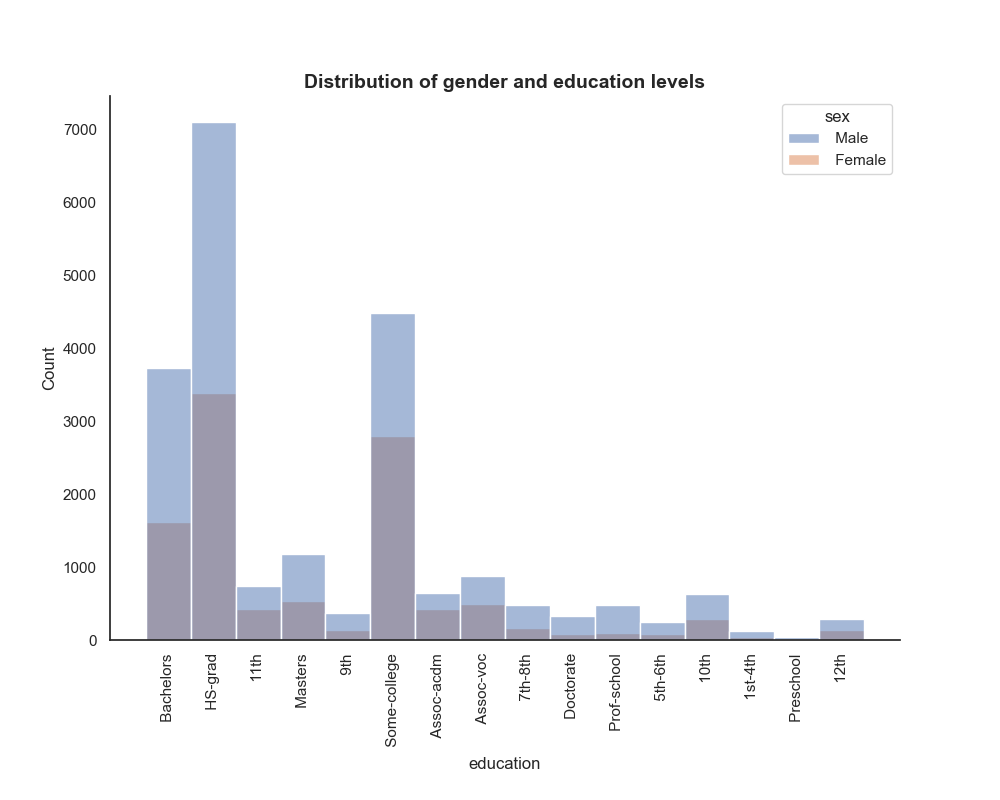

In [8]:
Image.open('Distribution of gender and education levels.png')

**COMMENTS ON THE DISTRIBUTION** 

Since the data set contains more men than women, it is not surprising that there is a higher number of men educated at the different education levels. Overall, it seems the most frequent education level for both men and women are the HS graduate, followed by some college degree and bachelors. The rest of the education levels are significantly lower than these three.

In [9]:
ax = sns.histplot(data = df_census, 
                  x = 'race',
                  hue = 'race')

plt.title('Distribution of race', 
          fontsize = 14, 
          fontweight = 'bold')

plt.xticks(rotation = 90)

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

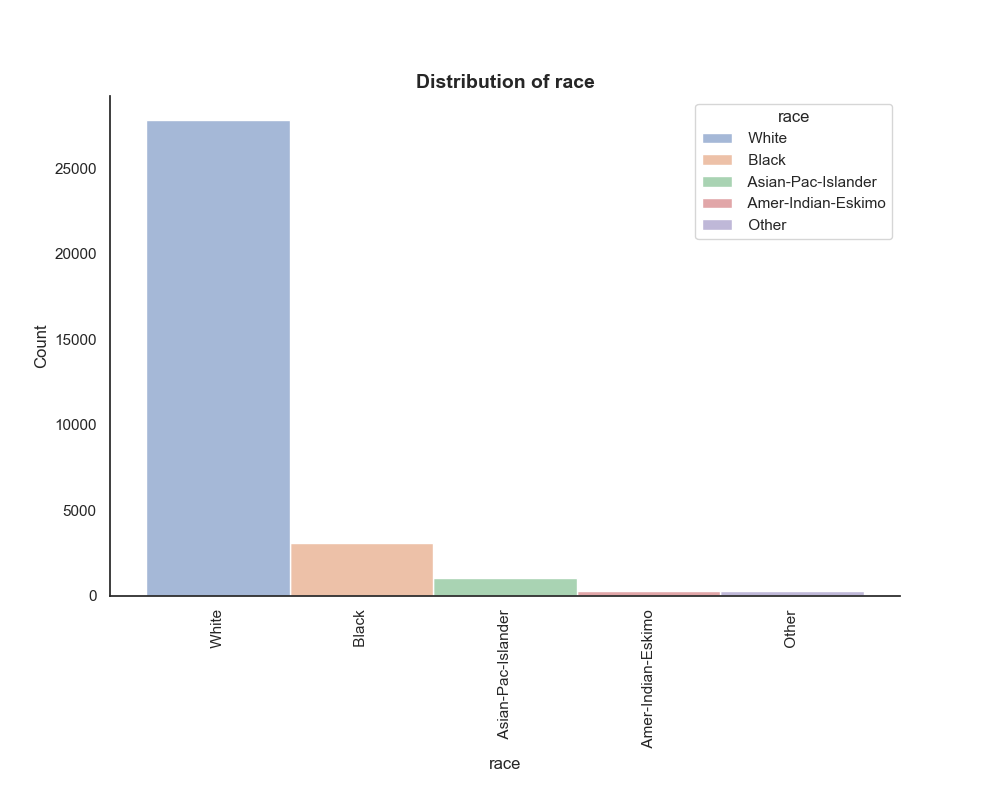

In [10]:
Image.open('Distribution of race.png')

**COMMENTS ON THE DISTRIBUTION** 

White people are the most populous race by a significant margin.

In [11]:
#plotting the distribution for education and race
ax = sns.histplot(data = df_census, 
                  x = 'education',
                  hue = 'race')

plt.title('Distribution of race and education levels', 
          fontsize = 14, 
          fontweight = 'bold')

plt.xticks(rotation = 90)

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

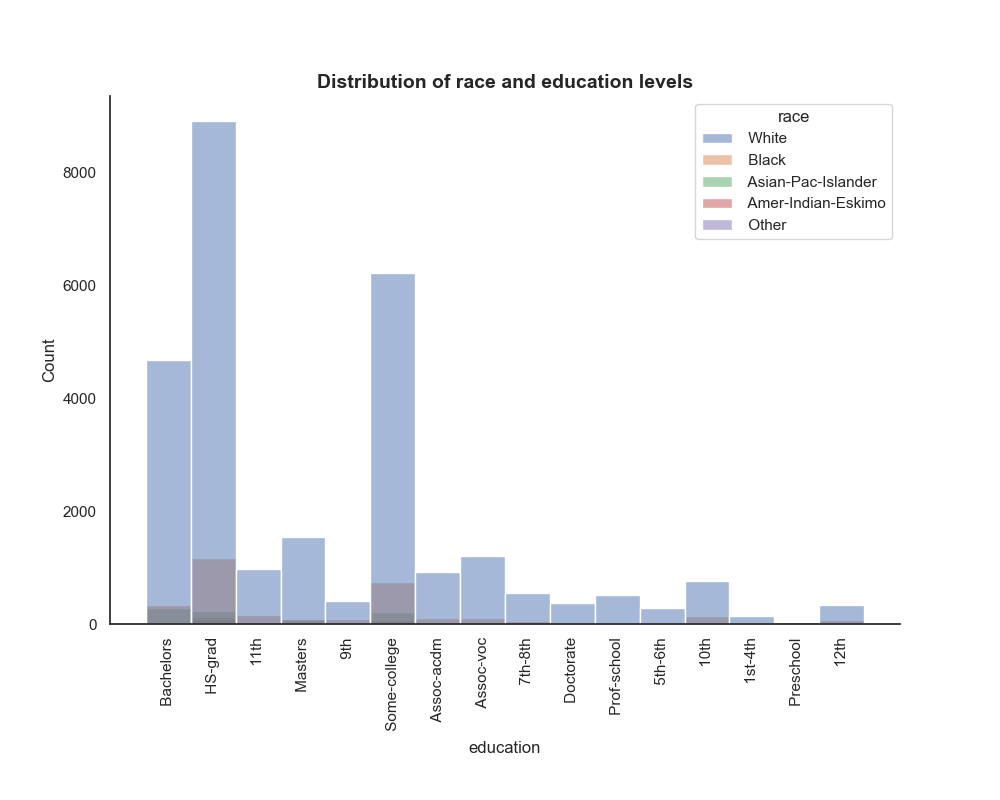

In [12]:
Image.open('Distribution of race and education levels.png')

**COMMENTS ON THE DISTRIBUTION** 

Since whites are the most populous race, they highly occupy all the education levels once again with HS graduates, some college degrees and bachelors being the top three, respectively.

In [13]:
#plotting the distribution of age and work class
ax = sns.histplot(data = df_census, 
                  x = 'age',
                  hue = 'work class')

plt.title('Distribution of age and work class', 
          fontsize = 14, 
          fontweight = 'bold')

plt.xticks(rotation = 90)

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

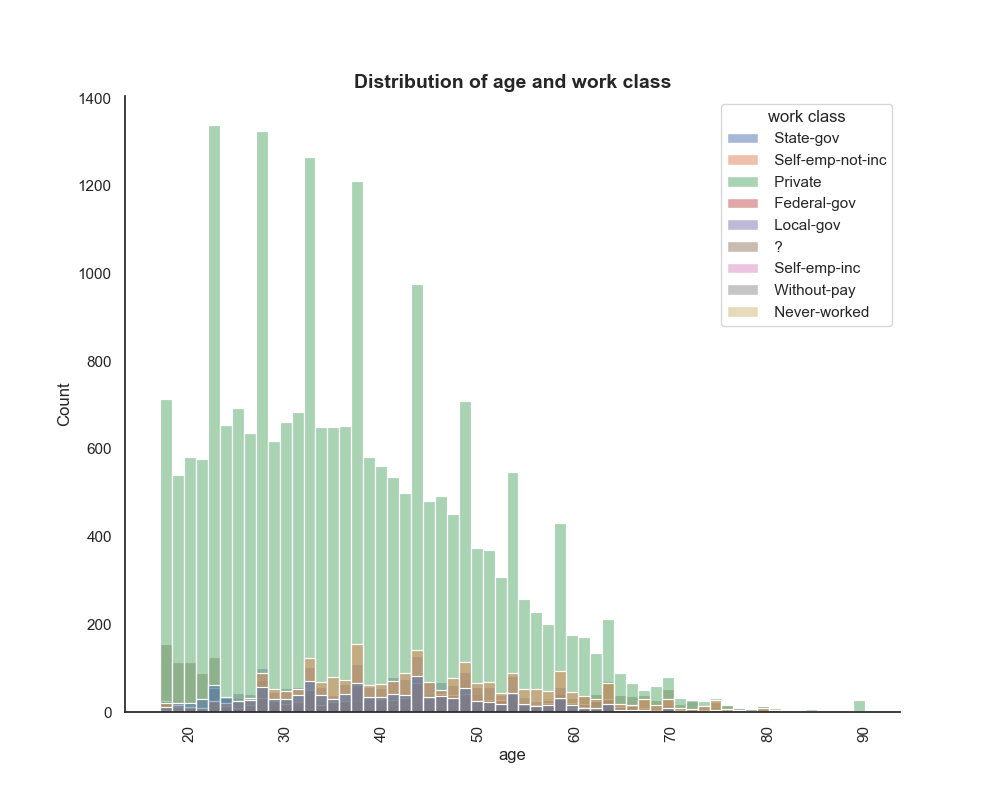

In [14]:
Image.open('Distribution of age and work class.png')

**COMMENTS ON THE DISTRIBUTION** 

The majority of the population do their trade in the private sector the ages of those range between their 20s to late 40s.

In [15]:
#plotting distribution of race and income
ax = sns.histplot(data = df_census, 
                  x = 'race',
                  hue = 'income')

plt.title('Distribution of race and income', 
          fontsize = 14, 
          fontweight = 'bold')

plt.xticks(rotation = 90)

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

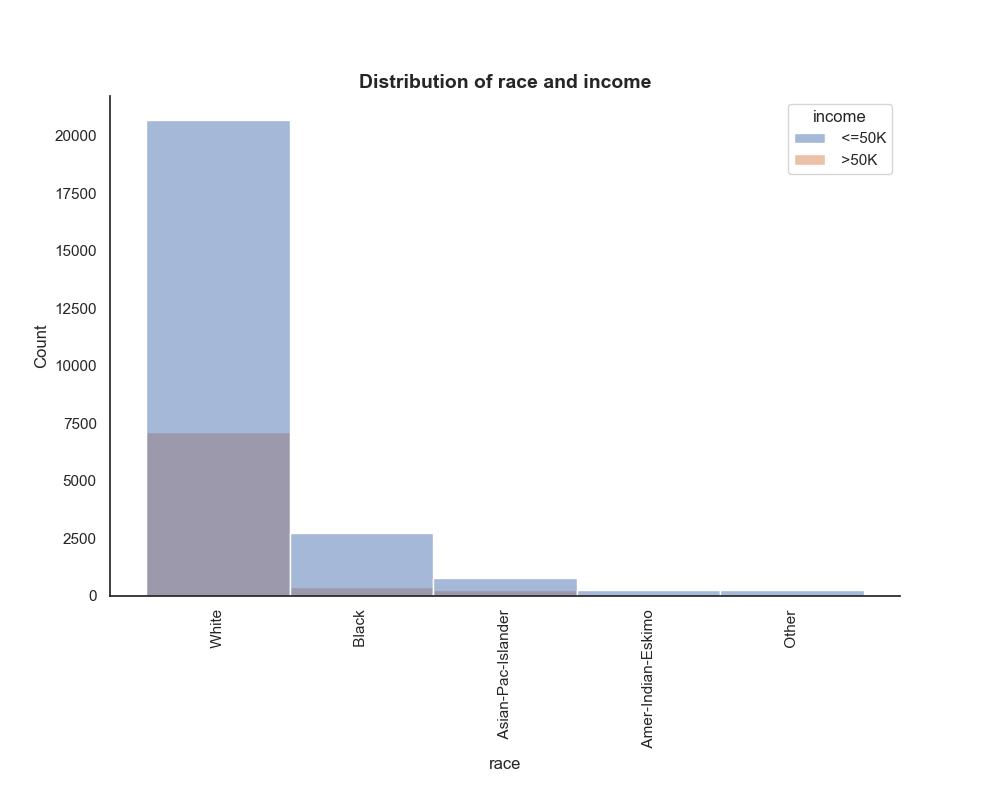

In [16]:
Image.open('Distribution of race and income.png')

**COMMENTS ON THE DISTRIBUTION** 

Whites as the most populous group in the data set dominate both income classes. However overall, for all races, more people earn less than or equal to US50,000.

In [17]:
#plotting distribution of occupation and income
ax = sns.histplot(data = df_census, 
                  x = 'occupation',
                  hue = 'income')

plt.title('Distribution of occupation and income', 
          fontsize = 14, 
          fontweight = 'bold')

plt.xticks(rotation = 90)

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

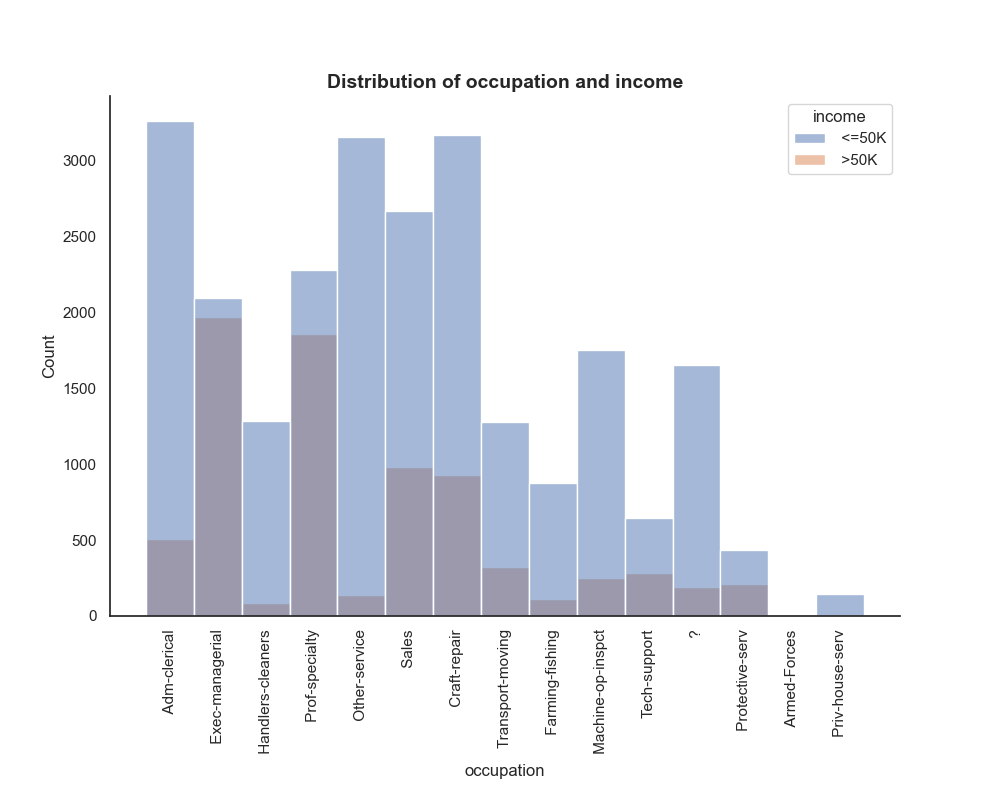

In [18]:
Image.open('Distribution of occupation and income.png')

**COMMENTS ON THE DISTRIBUTION** 

The occupations which have a high proportion of paying over US50,000 are Exec managerial and Prof-specialty.

In [19]:
#Plotting  distribution of occupation and gender
ax = sns.histplot(data = df_census, 
                  x = 'occupation',
                  hue = 'sex')

plt.title('Distribution of occupation and gender', 
          fontsize = 14, 
          fontweight = 'bold')

plt.xticks(rotation = 90)

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

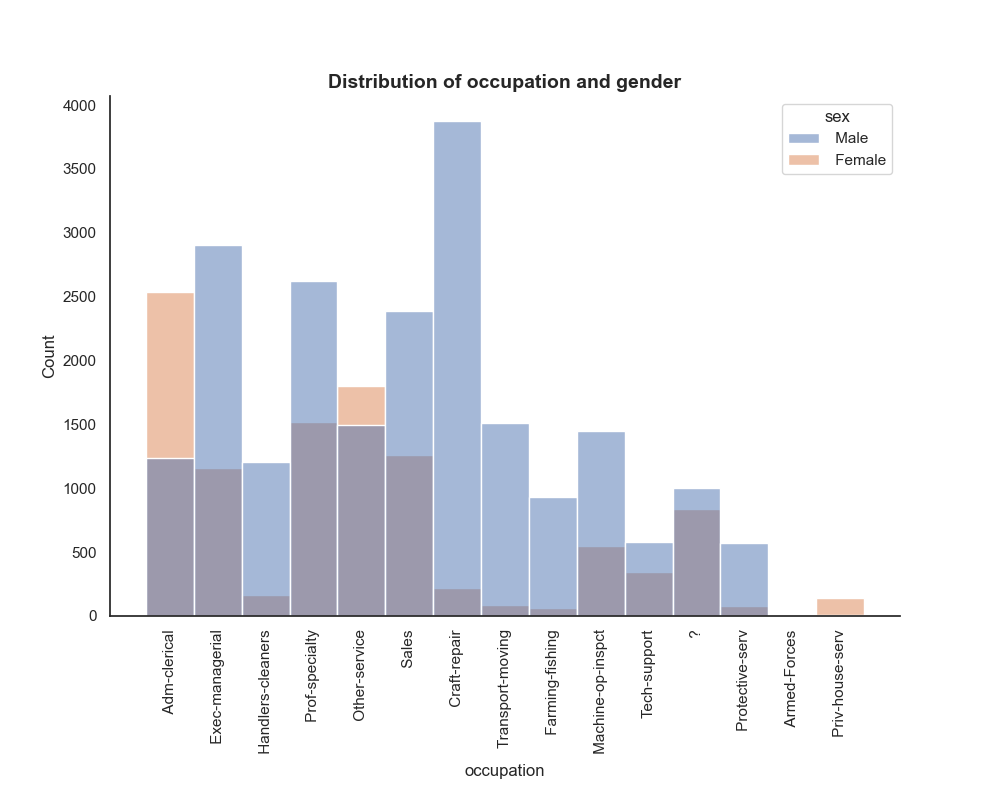

In [20]:
Image.open('Distribution of occupation and gender.png')

**COMMENTS ON THE DISTRIBUTION** 

The only occupations that are dominated by women are Adm-clerical, other services, and private house service.

In [21]:
#plotting distribution of marital status and income
ax = sns.histplot(data = df_census, 
                  x = 'marital status',
                  hue = 'income')

plt.title('Distribution of marital status and income', 
          fontsize = 14, 
          fontweight = 'bold')

plt.xticks(rotation = 90)

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

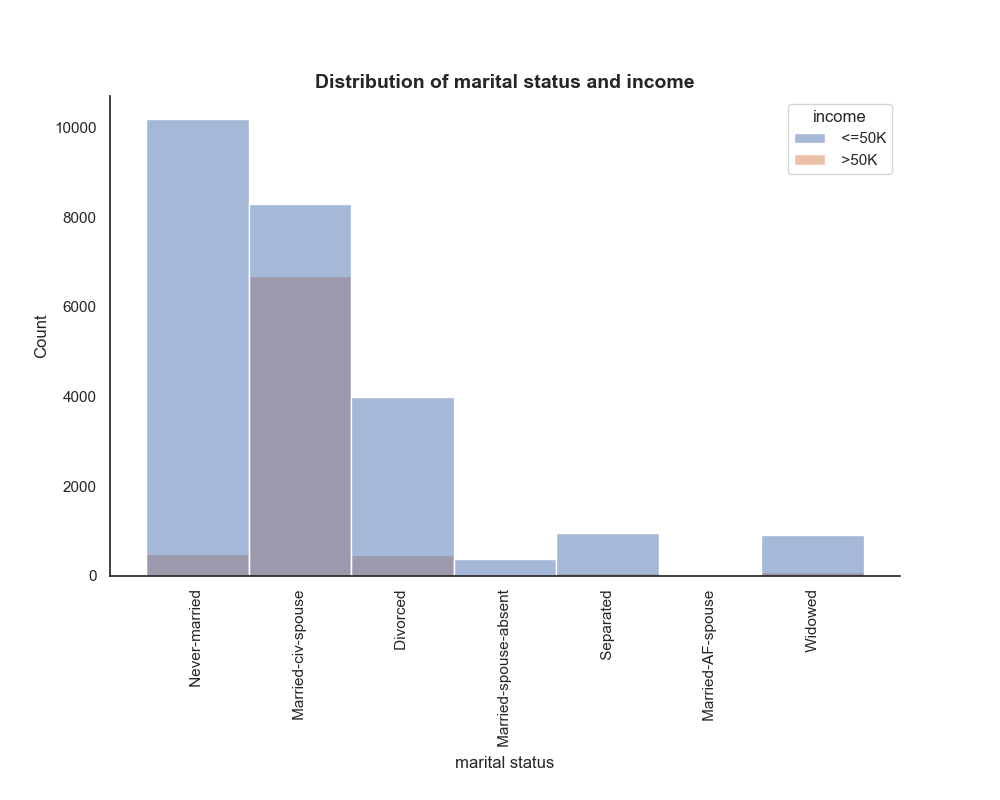

In [22]:
Image.open('Distribution of marital status and income.png')

**COMMENTS ON THE DISTRIBUTION** 

Married individuals or those with a spouse have a high proportion of earning more than US50,000 because it could be a case of having two incomes in the household, which can aggregate to over US50,000.

In [23]:
#plotting the distribution of hours per week and income
ax = sns.histplot(data = df_census, 
                  x = 'hours per week',
                  hue = 'income',
                  bins = 10)

plt.title('Distribution of hours worked per week and income', 
          fontsize = 14, 
          fontweight = 'bold')

plt.xticks(rotation = 90)

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

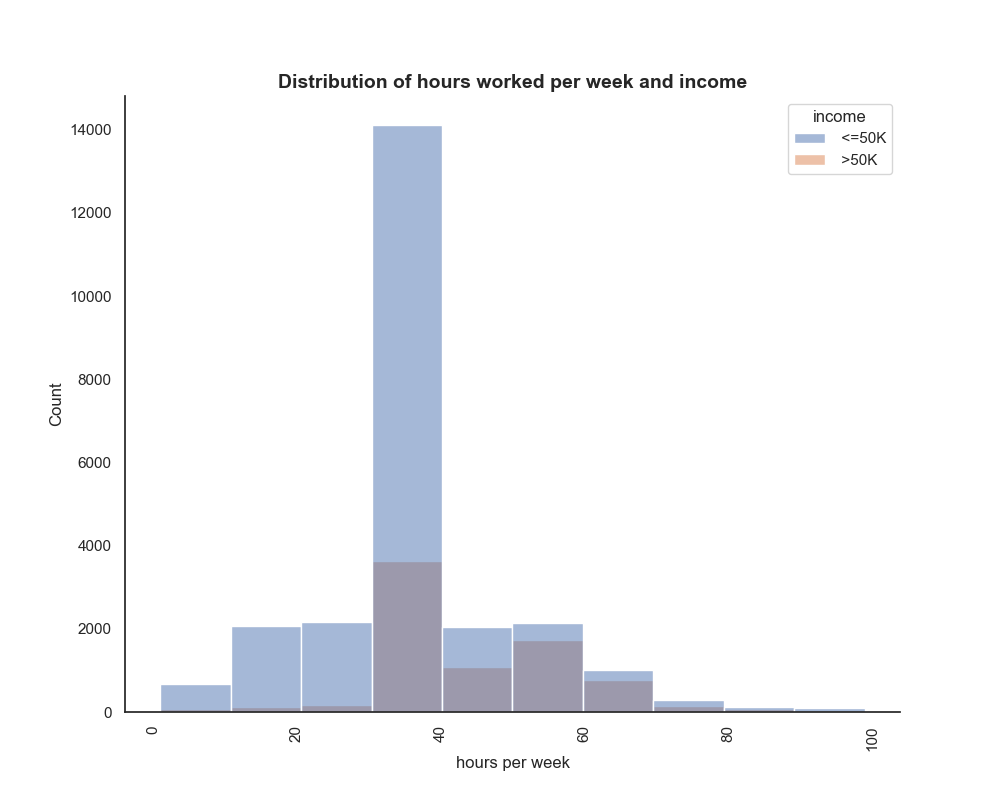

In [24]:
Image.open('Distribution of hours worked per week and income.png')

**COMMENTS ON THE DISTRIBUTION** 

From the distribution, it is evident that most work hours fall between 30 to 40 hours per week for both income groups.

In [25]:
#plotting the distribution of hours per week and income
ax = sns.histplot(data = df_census, 
                  x = 'native country',
                  hue = 'income')

plt.title('Distribution of native country and income', 
          fontsize = 14, 
          fontweight = 'bold')

plt.xticks(rotation = 90)

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

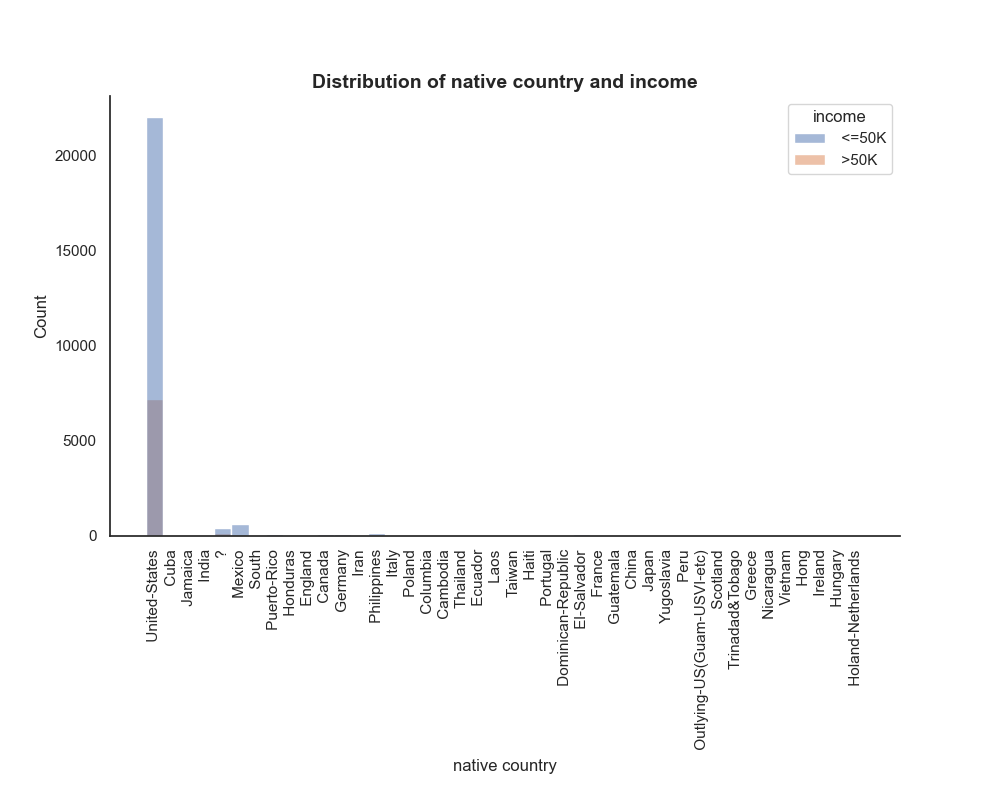

In [26]:
Image.open('Distribution of native country and income.png')

**COMMENTS ON THE DISTRIBUTION** 

Most of the population is made up of those from the United States and they dominate the income groups.

# Cleaning the dataset

To have a more accurate model all the numerical columns which are not categorical will be standardised as it is evident the columns are on different scales.

In [27]:
#Splitting the data frame
df_census_1 = df_census[['age', 'fnlwgt', 
                         'education num', 'capital gain', 
                         'capital loss', 'hours per week']]

df_census_2 = df_census[['work class', 'education', 
                         'marital status', 'occupation', 
                         'relationship', 'race',
                         'sex', 'native country', 'income']]

In [28]:
df_census_1.head()

,age,fnlwgt,education num,capital gain,capital loss,hours per week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


For those who don't know what fnlwgt is , this is 

In [29]:
df_census_2.head()

,work class,education,marital status,occupation,relationship,race,sex,native country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [30]:
#Extracting the value from the data frame, fitting and tranforming to a standadised format
x = df_census_1.values

scaler = StandardScaler()

scaled_data = scaler.fit_transform(x)

df_census_scaled = pd.DataFrame(scaled_data, 
                                columns=df_census_1.columns)

df_census_scaled.head()

,age,fnlwgt,education num,capital gain,capital loss,hours per week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [31]:
#concatenating the scaled data frame and the the categorical datframe
df_census = pd.concat([df_census_2, df_census_scaled],
                      axis = 1)

df_census.head()

,work class,education,marital status,occupation,relationship,race,sex,native country,income,age,fnlwgt,education num,capital gain,capital loss,hours per week
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [32]:
#checking if there are null values in the data set
df_census.isnull().sum() #no null values in the data set

work class        0
education         0
marital status    0
occupation        0
relationship      0
race              0
sex               0
native country    0
income            0
age               0
fnlwgt            0
education num     0
capital gain      0
capital loss      0
hours per week    0
dtype: int64

In [33]:
#checking on data types
df_census.dtypes

work class         object
education          object
marital status     object
occupation         object
relationship       object
race               object
sex                object
native country     object
income             object
age               float64
fnlwgt            float64
education num     float64
capital gain      float64
capital loss      float64
hours per week    float64
dtype: object

In [34]:
#have to label encode all categorical variables
work_class = LabelEncoder()
education = LabelEncoder()
marital_status = LabelEncoder()
occupation = LabelEncoder()
relationship = LabelEncoder()
race = LabelEncoder()
sex = LabelEncoder()
native_country = LabelEncoder()
income = LabelEncoder()

In [35]:
#fitting and transforming the data
df_census['work class_label'] = work_class.fit_transform(df_census['work class'])
df_census['education_label'] = education.fit_transform(df_census['education'])
df_census['marital status_label'] = marital_status.fit_transform(df_census['marital status'])  
df_census['occupation_label'] = occupation.fit_transform(df_census['occupation'])
df_census['relationship_label'] = relationship.fit_transform(df_census['relationship'])
df_census['race_label'] = race.fit_transform(df_census['race'])
df_census['sex_label'] = sex.fit_transform(df_census['sex'])
df_census['native country_label'] = native_country.fit_transform(df_census['native country'])
df_census['income_label'] = income.fit_transform(df_census['income'])

In [36]:
df_census.head()

,work class,education,marital status,occupation,relationship,race,sex,native country,income,age,...,hours per week,work class_label,education_label,marital status_label,occupation_label,relationship_label,race_label,sex_label,native country_label,income_label
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,0.030671,...,-0.035429,7,9,4,1,1,4,1,39,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,0.837109,...,-2.222153,6,9,2,4,0,4,1,39,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,-0.042642,...,-0.035429,4,11,0,6,1,4,1,39,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,1.057047,...,-0.035429,4,1,2,6,0,2,1,39,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,-0.775768,...,-0.035429,4,9,2,10,5,2,0,5,0


In [37]:
#dropping the unnecssary columns as I have labeled the categorical data accordingly
df_census.drop(columns=['work class', 'education',
                        'marital status', 'occupation',
                        'relationship','race', 
                        'sex', 'native country', 'income'], 
               axis = 1,
               inplace=True)

In [38]:
df_census.head()

,age,fnlwgt,education num,capital gain,capital loss,hours per week,work class_label,education_label,marital status_label,occupation_label,relationship_label,race_label,sex_label,native country_label,income_label
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,7,9,4,1,1,4,1,39,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,6,9,2,4,0,4,1,39,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,4,11,0,6,1,4,1,39,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,4,1,2,6,0,2,1,39,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4,9,2,10,5,2,0,5,0


In [39]:
#rearranging the columns to start with the dependent variable followed by the independent variable
df_census = df_census[[ 'income_label','age', 
                       'fnlwgt', 'education num', 
                       'capital gain', 'capital loss',
                       'hours per week', 'work class_label', 
                       'education_label','marital status_label', 
                       'occupation_label', 'relationship_label', 
                       'race_label', 'sex_label', 'native country_label']]

df_census.head()

,income_label,age,fnlwgt,education num,capital gain,capital loss,hours per week,work class_label,education_label,marital status_label,occupation_label,relationship_label,race_label,sex_label,native country_label
0,0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,7,9,4,1,1,4,1,39
1,0,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,6,9,2,4,0,4,1,39
2,0,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,4,11,0,6,1,4,1,39
3,0,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,4,1,2,6,0,2,1,39
4,0,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4,9,2,10,5,2,0,5


### Checking for muticollinearity in the data set using  variance inflation factor and correlation heatmap 

**What is VarianceIinflation Factor (VIF)**

VIF measures the amount of multicollinearity in a set of multiple regression variables. A high value of VIF indicates that the associated independent variables have a high correlation with each other.

A VIF of 1 indicates two variables are not correlated, a VIF between 1 and 5 indicates a moderate correlation, and a VIF above 5 indicates a high correlation.


In [40]:
#Calculation of VIF
X = add_constant(df_census) 
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                   65.030531
income_label             1.355068
age                      1.191224
fnlwgt                   1.012681
education num            1.327304
capital gain             1.063003
capital loss             1.030737
hours per week           1.153860
work class_label         1.094130
education_label          1.160777
marital status_label     1.137028
occupation_label         1.092370
relationship_label       1.687158
race_label               1.039443
sex_label                1.577015
native country_label     1.027639
dtype: float64

All variables have a VIF that is below 2 indicating little to no correlation with each other.

In [41]:
#checking for multicollinearity using heatmap
sns.heatmap(df_census.corr(), 
            annot=True, 
            fmt='.2f')

plt.title('Correlation heatmap', 
          fontsize =14, 
          fontweight = 'bold')

plt.show()

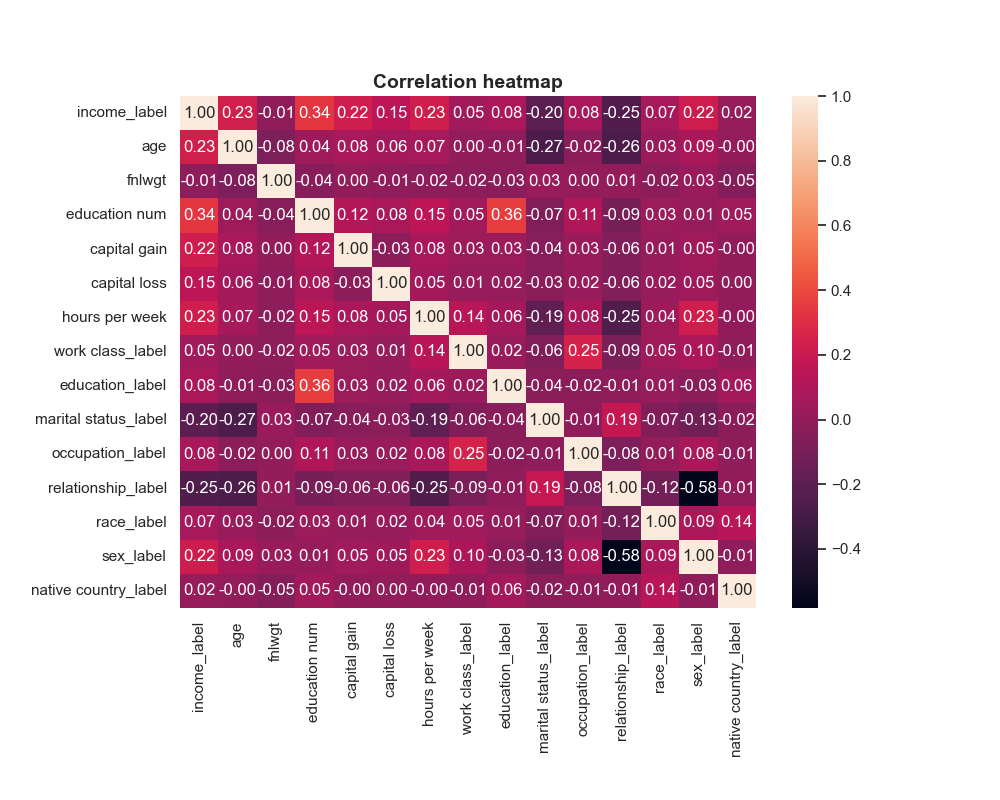

In [42]:
Image.open('Correlation heatmap.png')

From the correlation heamap there is low correlation across the board. Only the variables of sex_label and relationship label seem to have a moderate correlation but nothing of significance in this case.

# Training and testing the model

In [43]:
#determining the independent and dependent variable
x = df_census.drop(columns='income_label')
y = df_census['income_label']

#converting variable to numpy arrays
x_num = x.to_numpy()
y_num = y.to_numpy()

In [44]:
#creating the training and test variables 
x_train, x_test, y_train, y_test = train_test_split(x_num, y_num, test_size = 0.2, random_state = 40)

In [45]:
#creating the model 
log_model = LogisticRegression()

In [46]:
#fitting the model 
log_model.fit(x_train, y_train)

LogisticRegression()

In [47]:
#predicting the model
y_pred = log_model.predict(x_test)

In [48]:
#The model score with the training data 
log_model.score(x_train, y_train)

0.8250921375921376

In [49]:
#The model score with the tesing data
log_model.score(x_test, y_test)

0.8220482112697681

**COMMENTS ON THE MODEL SCORE**

Both the training and test scores are high and relatively the same showing an accuracy of about 82% for the model

In [50]:
#building the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4920
           1       0.71      0.47      0.56      1593

    accuracy                           0.82      6513
   macro avg       0.77      0.70      0.73      6513
weighted avg       0.81      0.82      0.81      6513



**COMMENTS ON THE CLASSIFICATION REPORT**

In the classification report there are 3 important metrics which are the *precision, recall and f1-score*

-> Precision measures the percentage of correct positive predictions relative to the total actual positives:
For the model the precision is 71%.

-> Recall measures the percentage of correct positive predictions relative to total actual positives: 
For the model the recall is 47%.

-> F1-score is a weighted mean of precision and recall:
for the model the F1-score is 56%

In [51]:
con_matrix = confusion_matrix(y_test, y_pred)
con_matrix

array([[4608,  312],
       [ 847,  746]], dtype=int64)

In [58]:
#plotting the confusion matrix on a heatmap
ax = sns.heatmap(con_matrix, 
                 annot=True, 
                 fmt='f')

ax.set_title('Confusion Matrix', 
             fontsize = 14, 
             fontweight = 'bold')

ax.set_xlabel('Predicted Values')

ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['<=50k (0)','>50k (1)'])

ax.yaxis.set_ticklabels(['<=50k (0)','>50k (1)'])

plt.show()

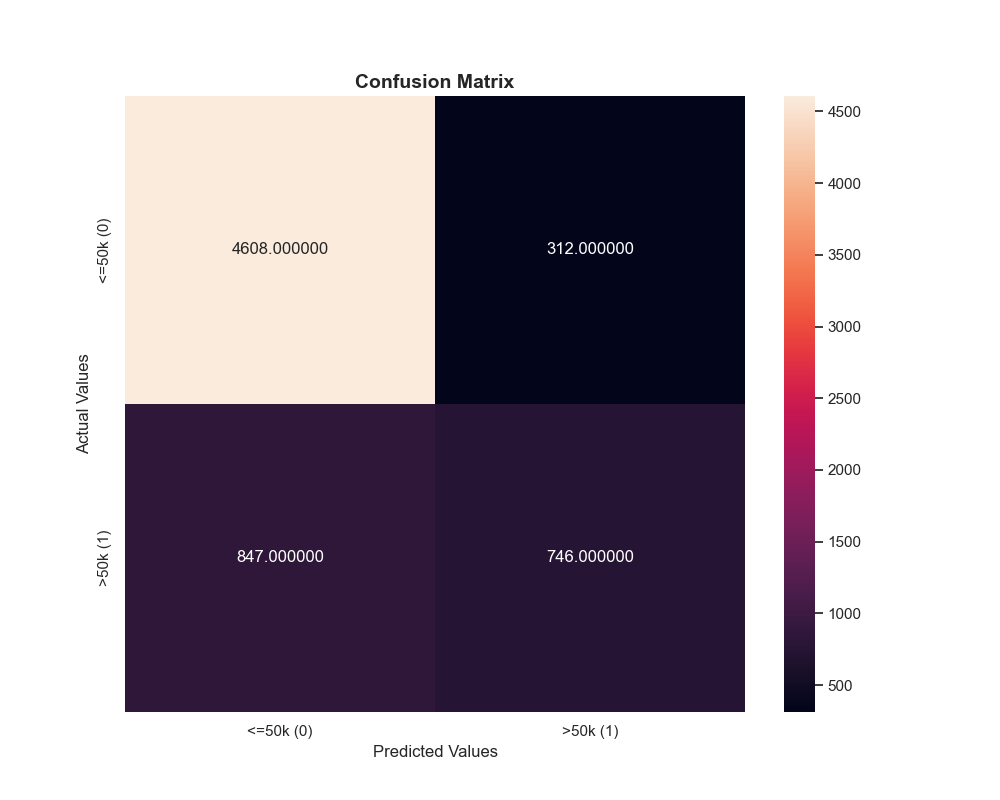

In [59]:
Image.open('confusion_matrix.png')

**WHAT IS A CONFUSION MATRIX**

A confusion matrix is used to determine the classifier performance based on true positive(TP), true negative(TN), false postive(FN) and false negative(FN).

In the case of this model:

TN -> 4608 people earning less than or equal to 50K were correctly predicted.

TP -> 744 people earning more than 50K were correctly predicted.

FN -> 849 people were misclassified as earning less than or equal to 50k.

FP -> 312 people were misclassified as earning more than 50k.

In [60]:
#Plotting the ROC and AUC
logit_roc_auc = roc_auc_score(y_test, log_model.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(x_test)[:,1])


plt.plot(fpr, 
         tpr, 
         label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic', 
          fontsize = 14, 
          fontweight = 'bold')
plt.legend(loc="lower right")
plt.show()

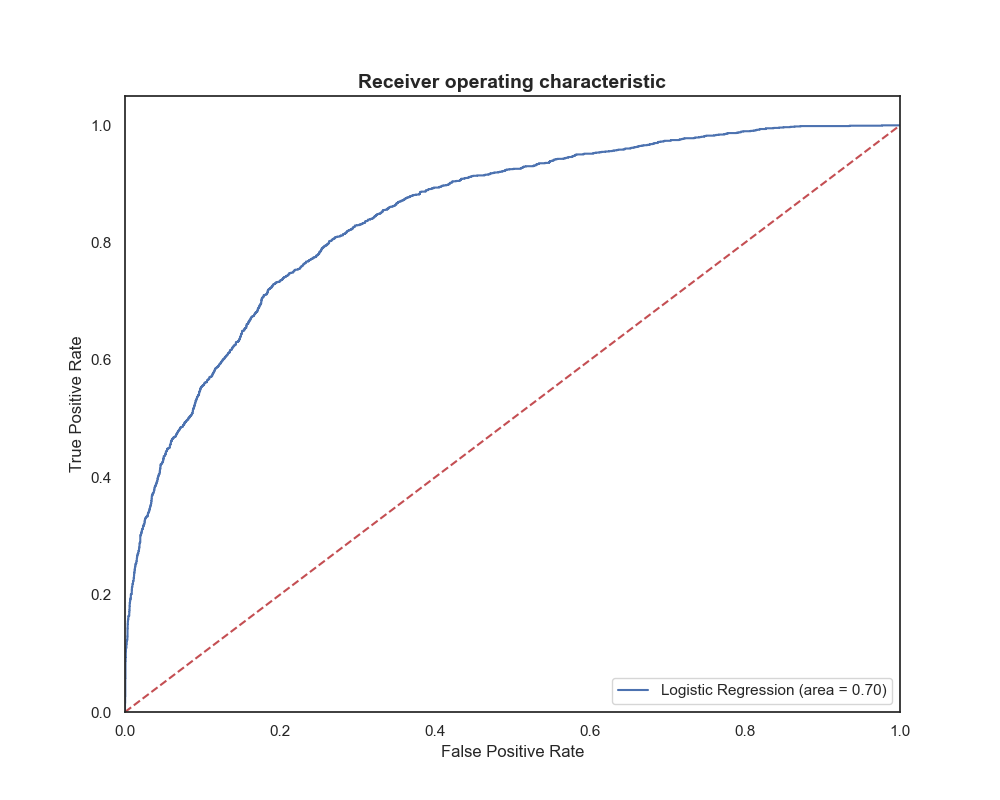

In [61]:
Image.open('Log_ROC.png')

**What is the Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC)**

The ROC and AUC are used to visualise the perfomance of our classification model.

The ROC is a graph that shows a classification models performance at all classification thresholds. The curve plots two parameters which are:
(i) True Positve Rate (TPR) and (ii) False Positive Rate (FPR).

ROC plots TPR vs FPR at different classification thresholds. 

AUC measures the entire area underneath the ROC curve. AUC ranges from 0 to 1 and the closer to 1 indicates a good model and a poor model will be closer to 0.

In the case of our model the AUC is 0.70 (70%). This means that there is a 70% chance that the model will be able to distinguish between the two classes of <=50k and >50k.
